# Trend of Agent Utilization Over Time (Weekly Analysis)

# Importing Libaries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 

In [63]:
df_expansion = pd.read_csv("../staging/data_set/cleaned_expansion.csv")
df_utilization = pd.read_csv("../staging/data_set/cleaned_utilization_eda.csv")

# Formatting Date

In [64]:
df_utilization["score_date"] = pd.to_datetime(df_utilization["score_date"], errors="coerce")
df_utilization["year_week"] = df_utilization["score_date"].dt.to_period("W").astype(str)

df_expansion["score_date"] = pd.to_datetime(df_expansion["score_date"], errors="coerce")
df_expansion["year_week"] = df_expansion["score_date"].dt.to_period("W").astype(str)


# Merge Utilization and Expansion data


In [65]:
df_merged = pd.merge(df_utilization, df_expansion, on=["id","year_week"], how="inner")


# Calculate churn based on Agent utilization

In [66]:
weekly_utilization = df_merged.groupby("year_week")["agent_utilization"].sum().reset_index()
weekly_utilization = weekly_utilization.sort_values("year_week")

# Visualization

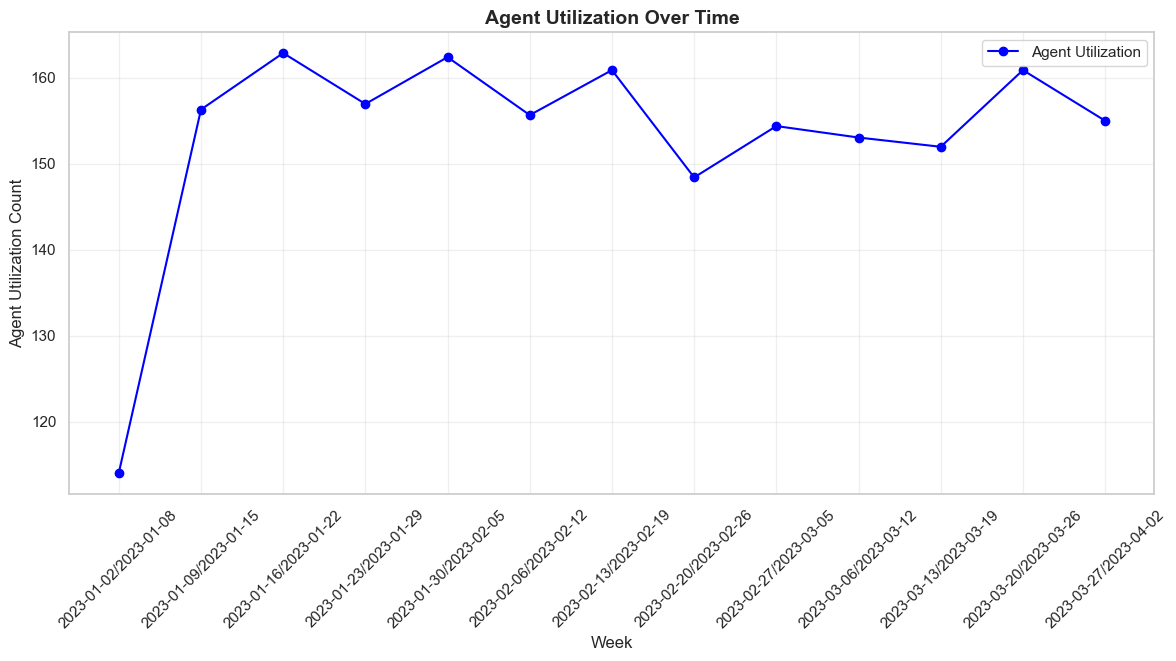

In [67]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.plot(weekly_utilization["year_week"], weekly_utilization["agent_utilization"], 
         marker="o", linestyle="-", color="blue", label="Agent Utilization")

plt.title("Agent Utilization Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Agent Utilization Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)

plt.show()